In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import tensorflow as tf

import sys
sys.path.append('..')
from sleeprnn.nn import wave_augment
from sleeprnn.data import utils
from sleeprnn.common import viz

In [16]:
# Definitions
window = 6
fs = 200
t = np.arange(window * fs) / fs
segment_label_ss = np.array([[100, 300]])
segment_label_ss = utils.stamp2seq(segment_label_ss, 0, window*fs-1)
tf.reset_default_graph()
soft_mask_tf = wave_augment.generate_soft_mask_from_labels_tf(segment_label_ss, fs, use_background=False)
with tf.Session() as sess:
    soft_mask = sess.run(soft_mask_tf)

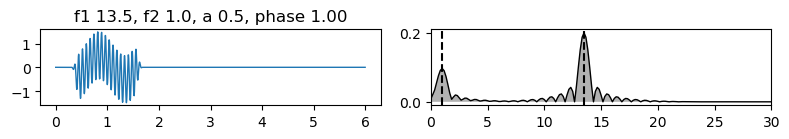

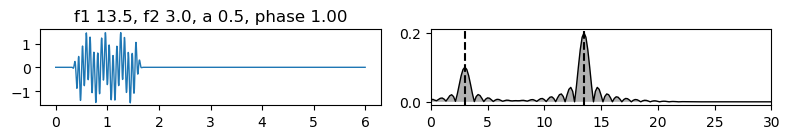

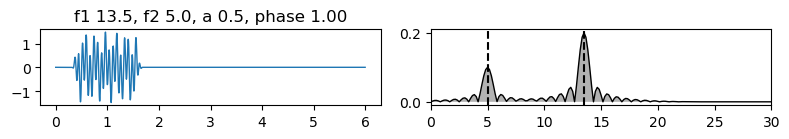

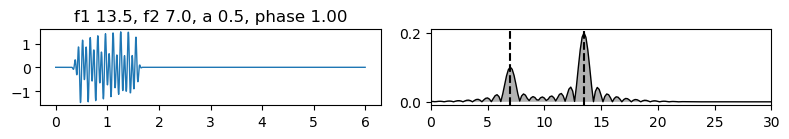

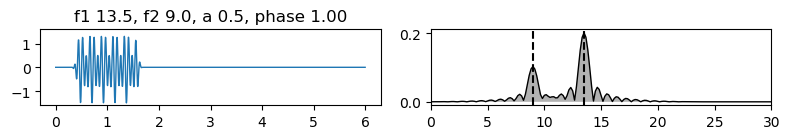

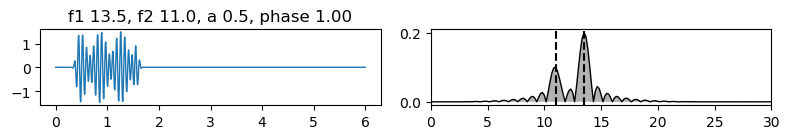

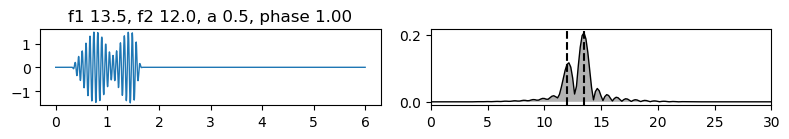

In [17]:
def draw_interference(freq_1, freq_2, amp_2, phase):
    x = np.cos(2 * np.pi * freq_1 * t) + amp_2 * np.cos(2 * np.pi * freq_2 * t + phase)
    x = x * soft_mask
    amp_freq, freqs = utils.power_spectrum(x, fs)
    fig, axes = plt.subplots(1, 2, figsize=(8, 1.5), dpi=100)
    axes[0].plot(t, x, linewidth=1)
    axes[0].set_ylim([-1-amp_2-0.1, 1+amp_2+0.1])
    axes[1].plot(freqs, amp_freq, linewidth=1, color='k')
    axes[1].fill_between(freqs, 0, amp_freq, facecolor='k', alpha=0.3)
    axes[1].set_xlim([0, 30])
    axes[1].axvline(freq_1, color='k', linestyle="--")
    axes[1].axvline(freq_2, color='k', linestyle="--")
    axes[0].set_title("f1 %1.1f, f2 %1.1f, a %1.1f, phase %1.2f" % (freq_1, freq_2, amp_2, phase))
    plt.tight_layout()
    plt.show()

freq_1 = 13.5
amp_2 = 0.5
phase = 1
freq_2_list = [1, 3, 5, 7, 9, 11, 12]
for freq_2 in freq_2_list:
    draw_interference(freq_1, freq_2, amp_2, phase)

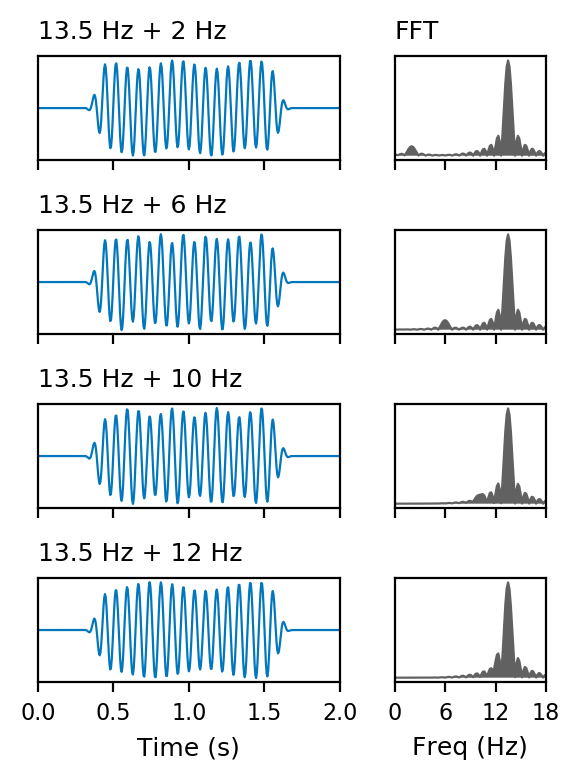

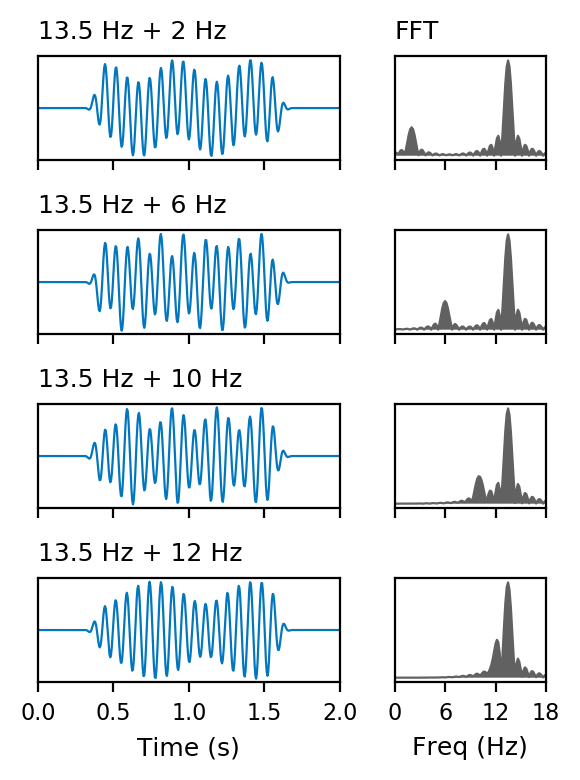

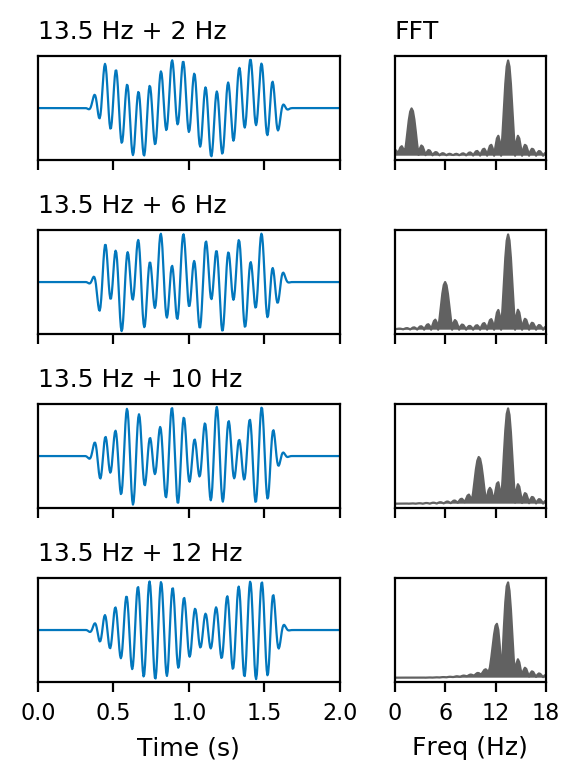

In [77]:
def draw_interference(axes, freq_1, freq_2, amp_2, phase):
    x = np.cos(2 * np.pi * freq_1 * t) + amp_2 * np.cos(2 * np.pi * freq_2 * t + phase)
    x = x * soft_mask
    amp_freq, freqs = utils.power_spectrum(x, fs)
    
    axes[0].set_title("%s Hz + %s Hz" % (freq_1, freq_2), loc="left", fontsize=9)
    axes[0].plot(t[:fs*2], x[:fs*2], linewidth=0.8, color=viz.PALETTE['blue'])
    axes[0].set_ylim([-1-amp_2-0.1, 1+amp_2+0.1])
    axes[0].set_xlim([0, 2])
    axes[0].set_yticks([])
    
    axes[1].plot(freqs, amp_freq, linewidth=0.8, color=viz.GREY_COLORS[7])
    axes[1].fill_between(freqs, 0, amp_freq, facecolor=viz.GREY_COLORS[7])
    axes[1].set_xlim([0, 18])
    axes[1].set_xticks([0, 6, 12, 18])
    axes[1].set_yticks([])
    # axes[1].axvline(freq_1, color='k', linestyle="--")
    # axes[1].axvline(freq_2, color='k', linestyle="--", label="%d Hz" % freq_2)
    # axes[1].legend(loc="upper left", fontsize=7)
    return axes


amp_2_list = [0.1, 0.3, 0.5]
for amp_2 in amp_2_list:
    freq_1 = 13.5
    phase = 1
    freq_2_list = [2, 6, 10, 12]
    n_cases = len(freq_2_list)

    fig = plt.figure(figsize=(3, n_cases), dpi=200)
    gs = gridspec.GridSpec(n_cases, 2, width_ratios=[2, 1])
    for i, freq_2 in enumerate(freq_2_list):
        ax1 = fig.add_subplot(gs[i, 0])
        ax2 = fig.add_subplot(gs[i, 1])
        ax = [ax1, ax2]
        if i == 0:
            ax2.set_title("FFT", fontsize=9, loc="left")
        ax = draw_interference(ax, freq_1, freq_2, amp_2, phase)
        if i < n_cases-1:
            ax[0].set_xticklabels([])
            ax[1].set_xticklabels([])
        [s_ax.tick_params(labelsize=8) for s_ax in ax]
    ax[0].set_xlabel("Time (s)", fontsize=9)
    ax[1].set_xlabel("Freq (Hz)", fontsize=9)
    plt.tight_layout()
    plt.show()